In [2]:
import os, sys
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import importlib.util
import plotly.express as px

# Get current path from where script is executed
if os.name == 'nt':
    sep = '\\'
elif os.name == 'posix':
    sep = '/'
else:
    print(f'What is this OS? {os.name}')

path = os.getcwd()
path_datasets = path[:-len(f'Code{sep}src{sep}project_CSP_MATH_571')] + f'DataSets{sep}weather{sep}'


#MapGenerator Lib
path_maps = path + f'{sep}mapGeneration{sep}mapGeneration.py'
spec = importlib.util.spec_from_file_location("mapGeneration", path_maps)
mp = importlib.util.module_from_spec(spec)
spec.loader.exec_module(mp)


### Load Data 

In [64]:
# Read csv
datasets = os.listdir(path_datasets)

df_list = []
for dataset in datasets:
    if dataset[-4:] == '.csv':
        df = pd.read_csv(path_datasets + dataset, index_col=None, header=0, na_values=['M','T'])
        df_list.append(df)


# Merge Taxis Data
df = pd.concat(df_list, axis=0, ignore_index=True)

del(df_list)

df.head()

station             valid  tmpf   relh   drct  sknt  p01m skyc1
0     ORD  2017-01-01 00:51  23.0  84.39  250.0   4.0   0.0   CLR
1     ORD  2017-01-01 01:51  21.0  84.62    0.0   0.0   0.0   CLR
2     ORD  2017-01-01 02:51  21.0  87.97  210.0   4.0   0.0   CLR
3     ORD  2017-01-01 03:51  19.0  87.87  190.0   5.0   0.0   CLR
4     ORD  2017-01-01 04:51  21.0  87.97  200.0   4.0   0.0   CLR

### Shape of Dataset

In [65]:
df.shape

(34278, 8)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34278 entries, 0 to 34277
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  34278 non-null  object 
 1   valid    34278 non-null  object 
 2   tmpf     32575 non-null  float64
 3   relh     32476 non-null  float64
 4   drct     33885 non-null  float64
 5   sknt     34212 non-null  float64
 6   p01m     28725 non-null  float64
 7   skyc1    34251 non-null  object 
dtypes: float64(5), object(3)
memory usage: 2.1+ MB


In [67]:
for col in df.columns: 
    print(col) 

station
valid
tmpf
relh
drct
sknt
p01m
skyc1


In [68]:
df = df.rename(columns={"valid": "datetime","tmpf": "temperature", "relh":"relative_humidity","drct": "wind_direction","sknt":"wind_speed",
                "p01m":"precipitation","skyc1":"sky_level"})

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34278 entries, 0 to 34277
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station            34278 non-null  object 
 1   datetime           34278 non-null  object 
 2   temperature        32575 non-null  float64
 3   relative_humidity  32476 non-null  float64
 4   wind_direction     33885 non-null  float64
 5   wind_speed         34212 non-null  float64
 6   precipitation      28725 non-null  float64
 7   sky_level          34251 non-null  object 
dtypes: float64(5), object(3)
memory usage: 2.1+ MB


### Convert into datetime format

In [70]:
df['datetime'] =  pd.to_datetime(df['datetime'], format=r"%Y-%m-%d %H:%M")

In [71]:
df

station            datetime  temperature  relative_humidity  \
0         ORD 2017-01-01 00:51:00         23.0              84.39   
1         ORD 2017-01-01 01:51:00         21.0              84.62   
2         ORD 2017-01-01 02:51:00         21.0              87.97   
3         ORD 2017-01-01 03:51:00         19.0              87.87   
4         ORD 2017-01-01 04:51:00         21.0              87.97   
...       ...                 ...          ...                ...   
34273     ORD 2019-12-30 21:51:00         27.0              88.65   
34274     ORD 2019-12-30 22:23:00         27.0              84.66   
34275     ORD 2019-12-30 22:33:00         27.0              84.66   
34276     ORD 2019-12-30 22:51:00         27.0              80.83   
34277     ORD 2019-12-30 23:51:00         27.0              80.83   

       wind_direction  wind_speed  precipitation sky_level  
0               250.0         4.0            0.0       CLR  
1                 0.0         0.0            0.0       CLR  
2               210.0         4.0            0.0       CLR  
3               190.0         5.0            0.0       CLR  
4               200.0         4.0            0.0       CLR  
...               ...         ...            ...       ...  
34273           230.0        19.0            NaN       SCT  
34274           240.0        14.0            NaN       SCT  
34275           240.0        19.0            NaN       SCT  
34276           240.0        20.0            NaN       BKN  
34277           250.0        16.0            NaN       BKN  

[34278 rows x 8 columns]

### Count of missing value

In [72]:
 df.isna().sum()

station                 0
datetime                0
temperature          1703
relative_humidity    1802
wind_direction        393
wind_speed             66
precipitation        5553
sky_level              27
dtype: int64

### Plot the missing value

In [ ]:
def plotmissing(col, time='M', fromDate=None, toDate=None, hist=False):
    # Randomly group by start timestamp
    df.index = df['datetime']
    # Total elements
    df_plot = df
    
    if fromDate is not None:
        df_plot = df_plot.loc[df_plot['datetime']>fromDate]      
    if toDate is not None:
        df_plot = df_plot.loc[df_plot['datetime']<toDate]  
        
    timeStart_grouped = df_plot[col].groupby(pd.Grouper(freq=time))
    # Total NA elements
    timeStart_tollNA_grouped = df_plot.loc[df_plot[col].isna(),].groupby(pd.Grouper(freq=time))

    y = 100 * timeStart_tollNA_grouped.size()/timeStart_grouped.size()

    # Plot
    sns.distplot(y
               

In [105]:
def plotmissing(col, time='M', fromDate=None, toDate=None, hist=False):
    # Randomly group by start timestamp
    df.index = df['datetime']
    # Total elements
    df_plot = df
    
    if fromDate is not None:
        df_plot = df_plot.loc[df_plot['datetime']>fromDate]      
    if toDate is not None:
        df_plot = df_plot.loc[df_plot['datetime']<toDate]  
        
    timeStart_grouped = df_plot[col].groupby(pd.Grouper(freq=time))
    # Total NA elements
    timeStart_tollNA_grouped = df_plot.loc[df_plot[col].isna(),].groupby(pd.Grouper(freq=time))

    y = 100 * timeStart_tollNA_grouped.size()/timeStart_grouped.size()

    # Plot
    plt.figure(figsize=(10,5))
    plt.fill_between(y.index, y, color='blue', alpha=0.5)
    plt.plot(y, color='red')
    plt.grid()
    plt.xticks(rotation=25, ha='right')
    plt.xlabel('Date')
    plt.ylabel('% of missing NA ')

    plt.show()

### Missing % of NA in temperature col

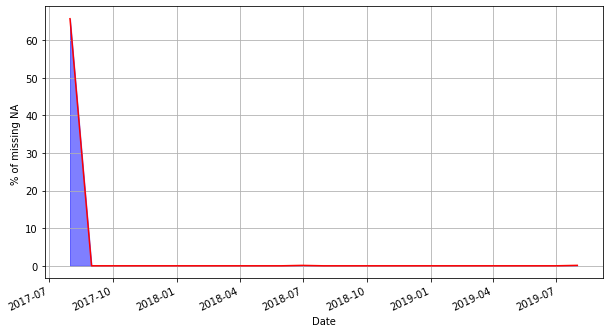

In [106]:
plotmissing('temperature')

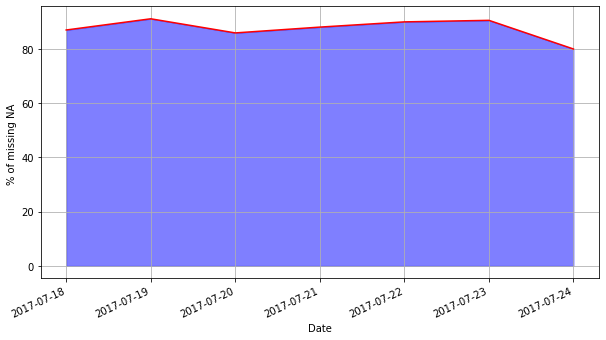

In [108]:
plotmissing('temperature', time='D', toDate=pd.to_datetime(r'2018-05', format='%Y-%m'))

### Plot temperature

In [74]:
temperaturefig = px.line(df, x='datetime', y='temperature')
fig.show()

NameError: name 'fig' is not defined

### Fill the missing value with last known value

In [35]:
def fill(x):
    l=len(x)
    for i in range(l):
        if(x.iloc[i]!='M'):
            t=x.iloc[i]
        else:
            x.iloc[i]=t


In [233]:
fill(df['temperature'])

C:\Users\Iconsense\Anaconda3\envs\abhishek\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### All the missing value in temperature

In [234]:
# df.loc[df['temperature'] == 'M']

In [235]:
# fig = px.line(df, x='datetime', y='temperature')
# fig.show()

### Plotting missing value of relative humidity

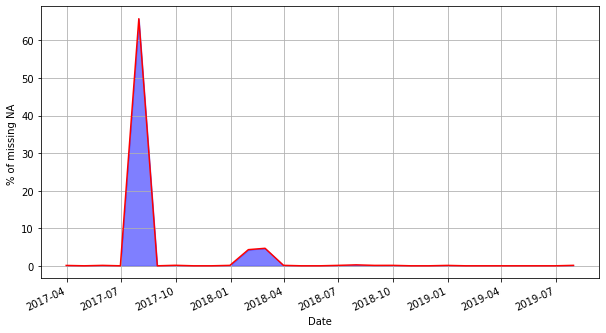

In [61]:
plotmissing('relative_humidity')

In [237]:
#df.loc[df['relative_humidity'] == 'M']

### Plotting relative humidity

In [238]:
fig = px.line(df, x='datetime', y='relative_humidity')
fig.show()

### Fill missing value of relative humidity

In [239]:
fill(df['relative_humidity'])

C:\Users\Iconsense\Anaconda3\envs\abhishek\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [240]:
#df.loc[df['relative_humidity'] == 'M']

### Plot missing value of wind direction

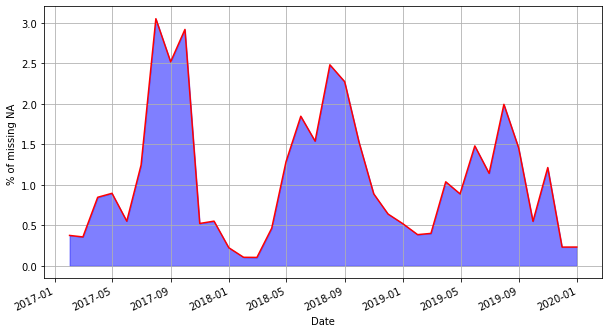

In [62]:
plotmissing('wind_direction')

### Fill missing value of wind direction

In [242]:
fill(df['wind_direction'])

C:\Users\Iconsense\Anaconda3\envs\abhishek\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [243]:
#df.loc[df['wind_direction'] == 'M']

In [244]:
fig = px.line(df, x='datetime', y='wind_direction')
fig.show()

### Plot missing value of Wind Speed

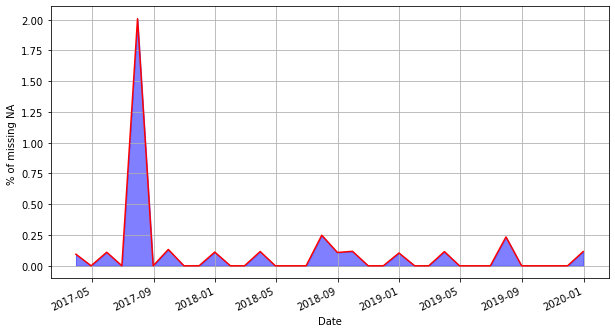

In [63]:
plotmissing('wind_speed')

### Plot Wind direction 

In [246]:
fig = px.line(df, x='datetime', y='wind_speed')
fig.show()

### Fill missing value

In [247]:
fill(df['wind_speed'])

C:\Users\Iconsense\Anaconda3\envs\abhishek\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Plot wind speed after filling missing value

In [248]:
# fig = px.line(df, x='datetime', y='wind_speed')
# fig.show()

In [249]:
#df.loc[df['wind_speed'] == 'M']

### Plot missing value of precipitation

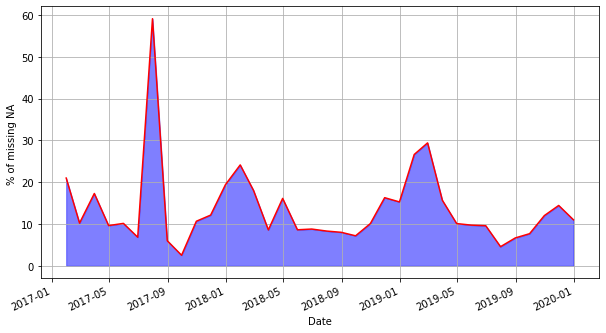

In [73]:
plotmissing('precipitation')

### Plot the precipitation

In [253]:
# fig = px.line(df, x='datetime', y='precipitation')
# fig.show()

### Fill the missing value

In [254]:
fill(df['precipitation'])

C:\Users\Iconsense\Anaconda3\envs\abhishek\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [255]:
l=len(df['precipitation'])
for i in range(l):
    if(df['precipitation'].iloc[i]!='T'):
        t=df['precipitation'].iloc[i]
    else:
        df['precipitation'].iloc[i]=t

In [256]:
# fig = px.line(df, x='datetime', y='precipitation')
# fig.show()

### missing value in sky level

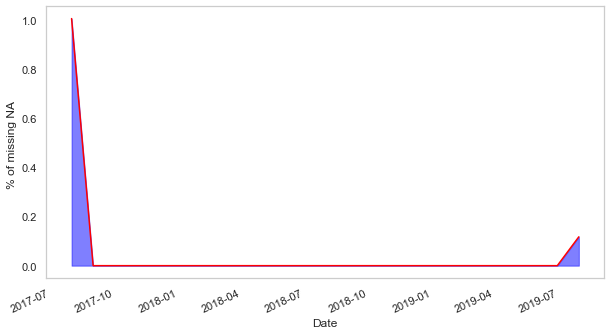

In [257]:
plotmissing('sky_level')

In [258]:

# ASOS Measured Human ASOS
# Amount in % Equivalent Report
# of sky cover in oktas
# 00 to < 05 0 CLR
# > 05 to < 25 > 0 to 2/8 FEW
# > 25 to < 50 > 2/8 to < 4/8 SCT
# > 50 to < 87 > 4/8 to < 8/8 BKN
# > 87 to 100 8/8 OVC

### Plot sky value

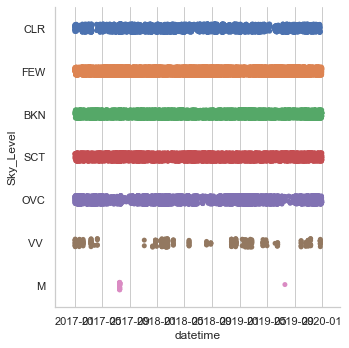

In [259]:
sns.catplot(x="datetime", y="sky_level", data=df)

In [260]:
#df.loc[df['sky_level'] == 'M'].head()

### Fill Missing value

In [261]:
fill(df['sky_level'])

C:\Users\Iconsense\Anaconda3\envs\abhishek\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



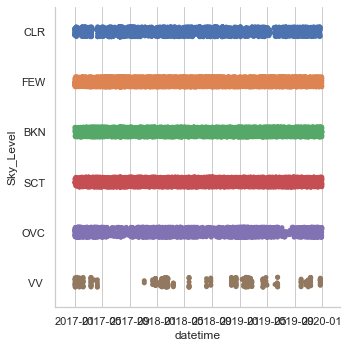

In [262]:
sns.catplot(x="datetime", y="sky_level", data=df)

In [263]:
df

station            datetime temprature relative_humidity  \
datetime                                                                       
2017-01-01 00:51:00     ORD 2017-01-01 00:51:00      23.00             84.39   
2017-01-01 01:51:00     ORD 2017-01-01 01:51:00      21.00             84.62   
2017-01-01 02:51:00     ORD 2017-01-01 02:51:00      21.00             87.97   
2017-01-01 03:51:00     ORD 2017-01-01 03:51:00      19.00             87.87   
2017-01-01 04:51:00     ORD 2017-01-01 04:51:00      21.00             87.97   
...                     ...                 ...        ...               ...   
2019-12-30 21:51:00     ORD 2019-12-30 21:51:00      27.00             88.65   
2019-12-30 22:23:00     ORD 2019-12-30 22:23:00      27.00             84.66   
2019-12-30 22:33:00     ORD 2019-12-30 22:33:00      27.00             84.66   
2019-12-30 22:51:00     ORD 2019-12-30 22:51:00      27.00             80.83   
2019-12-30 23:51:00     ORD 2019-12-30 23:51:00      27.00             80.83   

                    wind_direction Wind Speed precipitation Sky_Level  
datetime                                                               
2017-01-01 00:51:00         250.00       4.00          0.00       CLR  
2017-01-01 01:51:00           0.00       0.00          0.00       CLR  
2017-01-01 02:51:00         210.00       4.00          0.00       CLR  
2017-01-01 03:51:00         190.00       5.00          0.00       CLR  
2017-01-01 04:51:00         200.00       4.00          0.00       CLR  
...                            ...        ...           ...       ...  
2019-12-30 21:51:00         230.00      19.00          0.25       SCT  
2019-12-30 22:23:00         240.00      14.00          0.25       SCT  
2019-12-30 22:33:00         240.00      19.00          0.25       SCT  
2019-12-30 22:51:00         240.00      20.00          0.25       BKN  
2019-12-30 23:51:00         250.00      16.00          0.25       BKN  

[34278 rows x 8 columns]

In [270]:
df['temperature'] = pd.to_numeric(df['temperature'])
df['relative_humidity'] = pd.to_numeric(df['relative_humidity'])
df['wind_direction'] = pd.to_numeric(df['wind_direction'])
df['wind_speed'] = pd.to_numeric(df['wind_speed'])
df['precipitation'] = pd.to_numeric(df['precipitation'])




In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34278 entries, 2017-01-01 00:51:00 to 2019-12-30 23:51:00
Data columns (total 8 columns):
station              34278 non-null object
datetime             34278 non-null datetime64[ns]
temprature           34278 non-null float64
relative_humidity    34278 non-null float64
wind_direction       34278 non-null float64
Wind Speed           34278 non-null float64
precipitation        34278 non-null float64
Sky_Level            34278 non-null object
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 3.6+ MB


In [272]:
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

### Boxplot of all the features

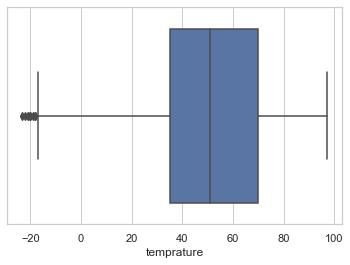

In [273]:
sns.set(style="whitegrid")

ax = sns.boxplot(x=df['temperature'])

In [287]:
df['temperature'].sort_values()

datetime
2019-01-30 06:51:00   -23.1
2019-01-30 07:51:00   -23.1
2019-01-30 05:51:00   -22.0
2019-01-30 08:51:00   -22.0
2019-01-31 05:51:00   -20.9
                       ... 
2018-08-04 12:51:00    95.0
2018-06-29 16:51:00    95.0
2018-05-27 14:51:00    95.0
2018-08-04 13:51:00    96.1
2018-05-27 15:51:00    97.0
Name: temprature, Length: 34278, dtype: float64

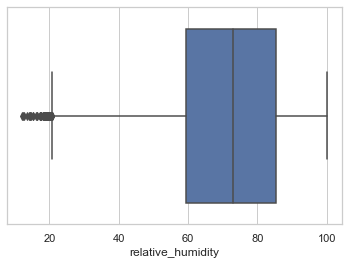

In [274]:
sns.set(style="whitegrid")

ax = sns.boxplot(x=df['relative_humidity'])

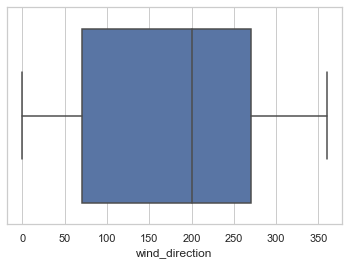

In [276]:
sns.set(style="whitegrid")

ax = sns.boxplot(x=df['wind_direction'])

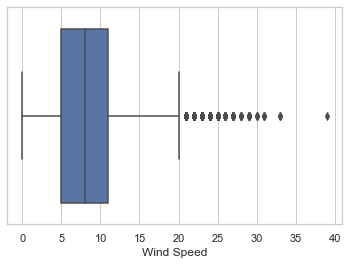

In [277]:
sns.set(style="whitegrid")

ax = sns.boxplot(x=df['wind_speed'])

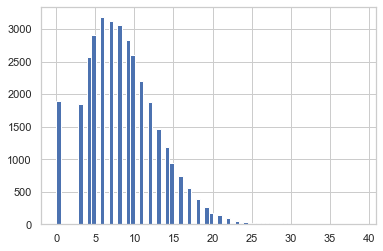

In [282]:
hist = df['wind_speed'].hist(bins=70)   

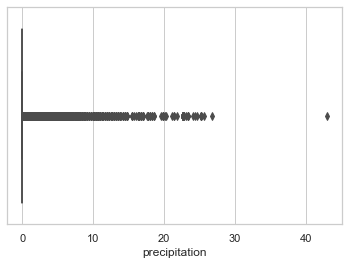

In [278]:
sns.set(style="whitegrid")

ax = sns.boxplot(x=df['precipitation'])

In [289]:
df['precipitation'].sort_values(ascending=False)

datetime
2018-08-07 15:51:00    42.93
2019-10-02 23:51:00    26.67
2018-08-07 15:43:00    25.65
2019-05-27 15:51:00    25.15
2019-05-27 15:02:00    25.15
                       ...  
2018-11-02 21:51:00     0.00
2018-11-02 22:51:00     0.00
2018-11-02 23:51:00     0.00
2018-11-03 00:51:00     0.00
2017-01-01 00:51:00     0.00
Name: precipitation, Length: 34278, dtype: float64

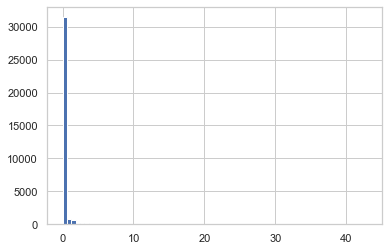

In [281]:
hist = df['precipitation'].hist(bins=70)      

# After studing all the boxplot and histogram and found the outlier to be the real case not error values therefore did not remove them